In [8]:
import numpy as np
from numpy import log2
import matplotlib.pyplot as plt

def generate_sort_array(size=20, min_elem=0, max_elem=100):
    """
    param size: требуемый размер массива
    param min_elem: нижняя граница рандома
    param max_elem: верхняя граница рандома
    return: отсортированный массив размера size с целочисленными значениями от min_elem до max_elem
    """
    return sorted(np.random.randint(min_elem, max_elem, size, dtype='int64'))

def interpolation_search(array, key):
    """
    param array: массив, в котором производится поиск. Должен быть отсортирован.
    param key: значение элемента, который ищется в массиве array
    return: tuple(pos, count), где 
        pos: позиция элемента key в массиве array или -1 если key не содержится в array
        count: количество итераций алгоритма, которое потребовалось для поиска
    """ 
    left = 0  # левая граница поиска (будем считать, что элементы массива нумеруются с нуля) 
    right = len(array) - 1  # правая граница поиска 
    count = 0 # счетчик количества проверок
    
    # начинаем поиск элемента
    while array[left] < key and key < array[right]:
        count += 2
        # индекс элемента, с которым будем проводить сравнение
        mid = left + (key - array[left]) * (right - left) // (array[right] - array[left])
        # выбор где искать дальше - слева или справа
        if array[mid] < key:
            count+=1
            left = mid + 1
        elif array[mid] > key:
            count+=1
            right = mid - 1
        else:
            return mid, count # элемент найден
    
    # остаточные проверки
    if array[left] == key:
        return left, count+1
    elif array[right] == key:
        return right, count+2
    else:
        return -1, count+2 # искомого элемента в массиве не найдено

n_list = [10, 100, 1000, 500000, 5000000, 10000000] # список значений размера массива
gens =   [20, 20,  20,   10,     5,       5] # количество повторений генерации для каждого n
repeats =[40, 40,  40,   20,     20,      20] # количество повторений поиска для каждой генерации
result = [] # средние значения количества операций сравнения
real_logs = [] # реальные значения функции log(log(3*n))
for k, n in enumerate(n_list):
    counts = 0
    for i in range(gens[k]):
        # генерируем случайный отсортированный массив
        a = generate_sort_array(size=n, min_elem=0, max_elem=n)
        for j in range(repeats[k]):
            # генерируем случайный ключ для поиска
            key = np.random.randint(0,n)
            # ищем ключ в массиве
            pos, count = interpolation_search(a, key)
            counts += count
    # усредняем и сохраняем результаты
    result.append(counts / (gens[k] * repeats[k]))
    real_logs.append(3*log2(log2(n)))
print(result)
print(real_logs)

[2.7, 5.50625, 8.0625, 10.875, 11.62, 11.8]
[5.196062536933858, 8.196062536933857, 9.950950039097327, 12.728166134812925, 13.427880412957995, 13.61812730310667]


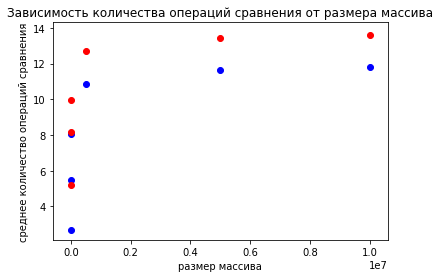

In [9]:
plt.scatter(n_list, result, c='b') # рисуем точки из эксперимента синим
plt.scatter(n_list, real_logs, c='r') # рисуем точки реальных значений красным

# оформление графика
plt.title('Зависимость количества операций сравнения от размера массива')
plt.xlabel('размер массива')
plt.ylabel('среднее количество операций сравнения')

# вывод графика
plt.show()